In [0]:
%matplotlib inline
%load_ext tensorboard
!pip install -q tensorflow==2.0.0-beta1
from __future__ import absolute_import, division, print_function, unicode_literals
import sys, os, datetime, time, scipy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from scipy import stats
from scipy.integrate import quad

### Benchmark Errors (MSE only)

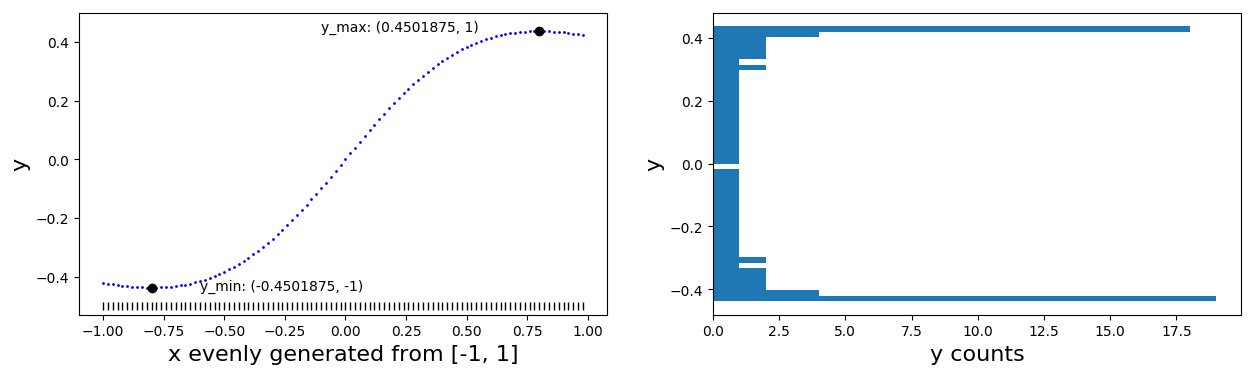

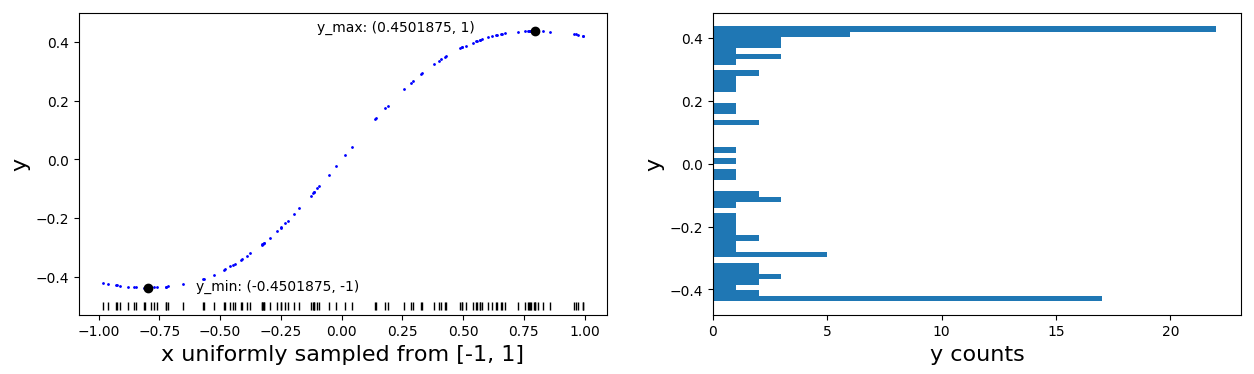

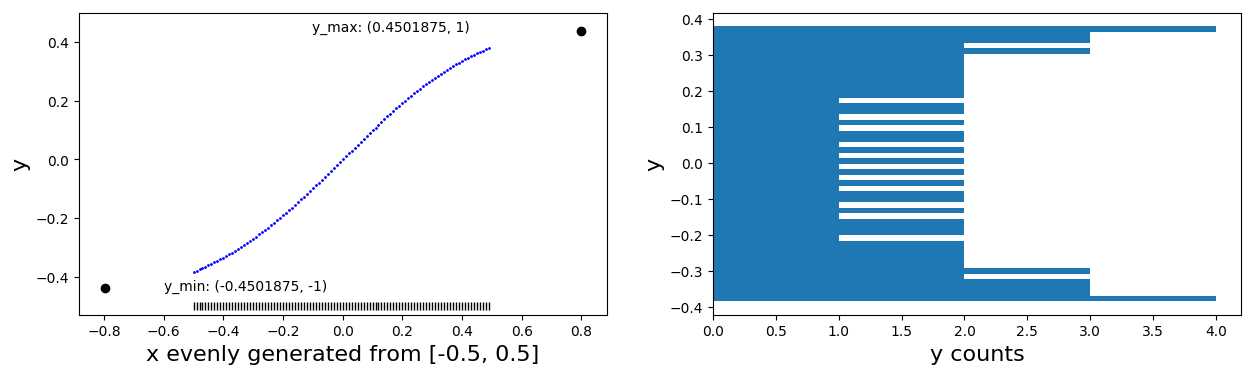

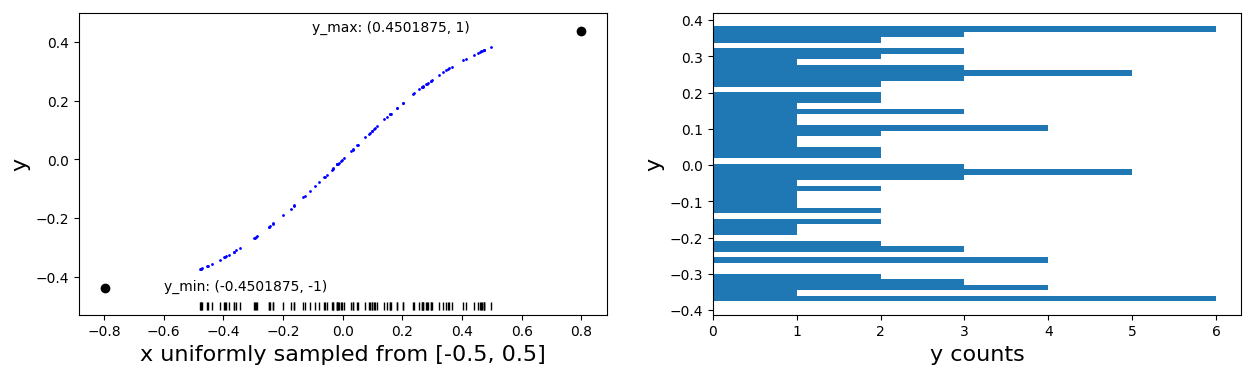

In [61]:
def plot_data(x, y, x_label='x∈[-1, 1]', title=None):
  
  fy=lambda x:np.sin(x)/(1+x**2)
  fy_reverse=lambda x:-np.sin(x)/(1+x**2)
  fy_min_x = scipy.optimize.fmin(fy, -0.798, disp=False)
  fy_max_x = scipy.optimize.fmin(fy_reverse, 0.798, disp=False)

  plt.figure(figsize=(15, 4), dpi=100, facecolor='w', edgecolor='k')
  plt.subplots_adjust(wspace = 0.2)
  
  ax1=plt.subplot(1, 2, 1)
  ax1.set_ylim([-0.53,0.5])
  ax1.set_xlabel(x_label, fontsize=16)
  ax1.set_ylabel("y", fontsize=16)
  ax1.scatter(x,y, c='blue', s=1)
  ax1.scatter(fy_min_x, fy(fy_min_x), c='black')
  ax1.scatter(fy_max_x, fy(fy_max_x), c='black')
  ax1.text(fy_min_x+0.2, fy(fy_min_x)-0.01, "y_min: (-0.4501875, -1)", fontsize=10)
  ax1.text(fy_max_x-0.9, fy(fy_max_x), "y_max: (0.4501875, 1)", fontsize=10)
  ax1.plot(x, np.full_like(x, -0.5), '|k', markeredgewidth=1)
  
  ax2=plt.subplot(1, 2, 2)
  ax2.patch.set_visible(False)
  ax2.hist(y, bins=50, orientation="horizontal");
  ax2.set_ylabel("y", fontsize=16)
  ax2.set_xlabel("y counts", fontsize=16)
  ax2.set_title(title, fontsize=16)
  
def get_data(data_size, sampling = 'strict', x_shrink = 1):
  
  if sampling == "uniform":
    seed=0
    x = [np.random.uniform(-1, 1) for i in range(100)]
  elif sampling == "strict":
    x = np.arange(-1, 1, 2/data_size)
    
  fy=lambda x:np.sin(x)/(1+x**2)
  
  x = [i*x_shrink for i in x]
  y = [fy(i) for i in x]

  return x, y

x, y = get_data(100)
plot_data(x, y, 'x evenly generated from [-1, 1]')
x, y = get_data(100, 'uniform')
plot_data(x, y, 'x uniformly sampled from [-1, 1]')

x, y = get_data(100, sampling = 'strict', x_shrink = 0.5)
plot_data(x, y, 'x evenly generated from [-0.5, 0.5]')
x, y = get_data(100, sampling = 'uniform', x_shrink = 0.5)
plot_data(x, y, 'x uniformly sampled from [-0.5, 0.5]')

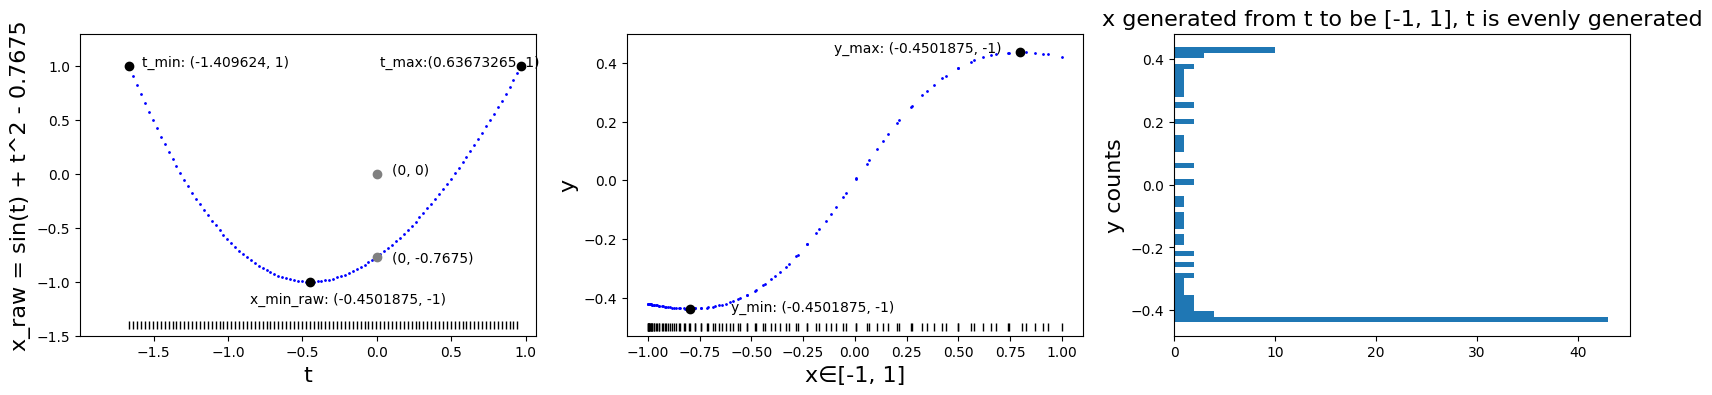

In [269]:
def plot_data_gen(x, y, fx_min_t, fx1_t_left, fx1_t_right):
 
  fx = lambda t:np.sin(t) + t**2 - 0.7675344248601964
  fx1 = lambda t:np.sin(t) + t**2 - 1.7675344248601964
  fy=lambda x:np.sin(x)/(1+x**2)
  fy_reverse=lambda x:-np.sin(x)/(1+x**2)
  fy_min_x = scipy.optimize.fmin(fy, -0.798, disp=False)
  fy_max_x = scipy.optimize.fmin(fy_reverse, 0.798, disp=False)
  

  plt.figure(figsize=(20, 4), dpi=100, facecolor='w', edgecolor='k')
  ts = np.arange(fx1_t_left, fx1_t_right, (fx1_t_right-fx1_t_left)/len(x))
  ax1=plt.subplot(1, 3, 1)
  plt.subplots_adjust(wspace = 0.2)
  ax1.scatter(ts, x, c='blue', s=1)
  
  ax1.scatter(0, 0, c='grey')
  ax1.scatter(0, -0.7675344248601964, c='grey')
  ax1.scatter(fx_min_t, fx(fx_min_t), c='black')
  ax1.scatter(fx1_t_left, fx(fx1_t_left), c='black')
  ax1.scatter(fx1_t_right, fx(fx1_t_right), c='black')
  
  ax1.plot(ts, np.full_like(ts, -1.4), '|k', markeredgewidth=1)
  
  ax1.text(fx1_t_left*0.95, 1, "t_min: (-1.409624, 1)", fontsize=10)
  ax1.text(fx1_t_right-0.95, 1, "t_max:(0.63673265, 1)", fontsize=10)
  ax1.text(fx_min_t-0.4, -1.2, "x_min_raw: (-0.4501875, -1)", fontsize=10)
  ax1.text(0.1, 0, "(0, 0)", fontsize=10)
  ax1.text(0.1, -0.7675344248601964-0.05, "(0, -0.7675)", fontsize=10)
  
  ax1.set_xlim([fx1_t_left*1.2,fx1_t_right*1.1])
  ax1.set_ylim([-1.5,1.3])
  ax1.set_xlabel("t", fontsize=16)
  ax1.set_ylabel("x_raw = sin(t) + t^2 - 0.7675", fontsize=16)
  
  ax2=plt.subplot(1, 3, 2)
  ax2.set_ylim([-0.53,0.5])
  ax2.set_xlabel("x∈[-1, 1]", fontsize=16)
  ax2.set_ylabel("y", fontsize=16)
  ax2.scatter(x,y, c='blue', s=1)
  ax2.scatter(fy_min_x, fy(fy_min_x), c='black')
  ax2.scatter(fy_max_x, fy(fy_max_x), c='black')
  
  ax2.text(fy_min_x+0.2, fy(fy_min_x)-0.01, "y_min: (-0.4501875, -1)", fontsize=10)
  ax2.text(fy_max_x-0.9, fy(fy_max_x), "y_max: (-0.4501875, -1)", fontsize=10)
  
  ax2.plot(x, np.full_like(x, -0.5), '|k', markeredgewidth=1)
  
  ax3=plt.subplot(1, 3, 3)
  ax3.patch.set_visible(False)
  ax3.hist(y, bins=50, orientation="horizontal");
  ax3.set_ylabel("y", fontsize=16)
  ax3.set_ylabel("y counts", fontsize=16)
  ax3.set_title("x generated from t to be [-1, 1], t is evenly generated", fontsize=16)
  
def get_data_gen(data_size, seed=0):
  # fx_ori = np.sin(t) + t**2
  # fx_ori_min_t = -0.4501875
  # fx_ori(-0.4501875) = -0.23246557513980357
  # 0.7675344248601964 = -1 -(-0.23246557513980357
  fx = lambda t:np.sin(t) + t**2 - 0.7675344248601964
  fx1 = lambda t:np.sin(t) + t**2 - 1.7675344248601964
  fy=lambda x:np.sin(x)/(1+x**2)
  fx_min_t = scipy.optimize.fmin(fx, 0, disp=False) #-0.4501875
  fx1_t_left = scipy.optimize.fsolve(fx1, -10) # -1.66233208
  fx1_t_right = scipy.optimize.fsolve(fx1, 10) # 0.97069789

  ts = np.arange(fx1_t_left, fx1_t_right, (fx1_t_right-fx1_t_left)/data_size)
  x = [fx(t) for t in ts]
  y = [fy(i) for i in x]

  return x, y, fx_min_t, fx1_t_left, fx1_t_right

x, y, fx_min_t, fx1_t_left, fx1_t_right = get_data_gen(100)
plot_data_gen(x, y, fx_min_t, fx1_t_left, fx1_t_right)


|    x     |    y   |  y_pred |  error  |  color  |
|---------:|:-------:|----------:|-----------:|---------:|
|    -1   |  f(-1) | n(-1)  | error_0 |color_0
| -0.5 |  f(-0.5)| n(-0.5)  |error_1 |color_1
| 0| f(0)   | n(0)  |error_2 |color_2
| 0.5| f(0.5)   |  n(0.5) |error_3 |color_3
| 1 | f(1) |n(1)  |error_4 |color_4

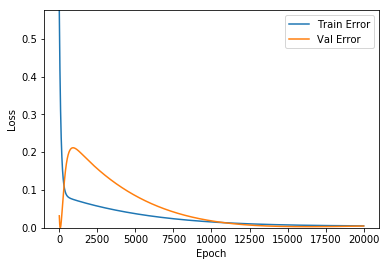

Spearman Correlation Coefficient: SpearmanrResult(correlation=0.13894173976695906, pvalue=0.0018446105384678892)


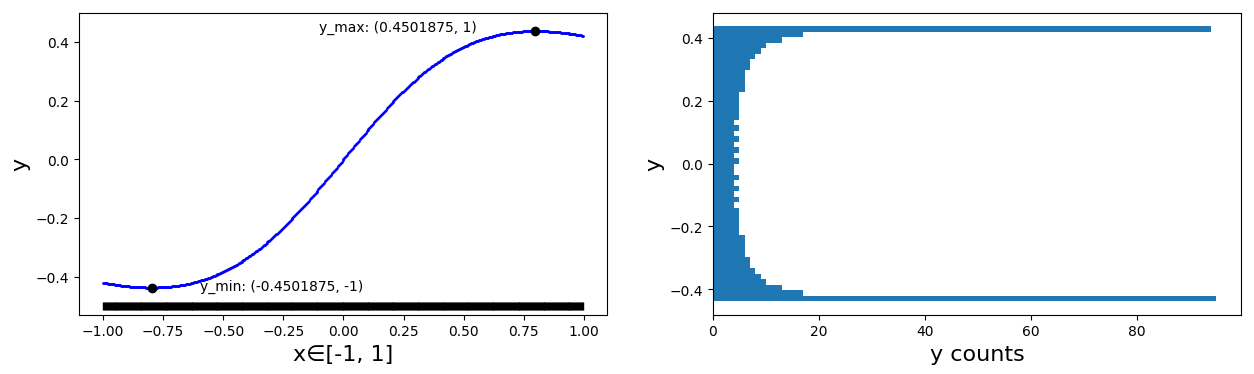

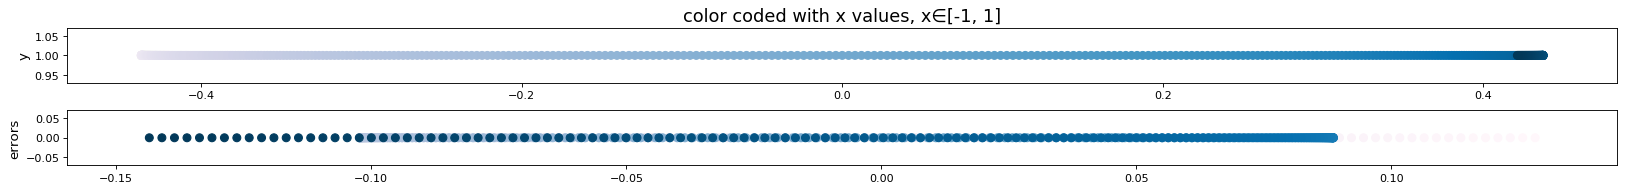

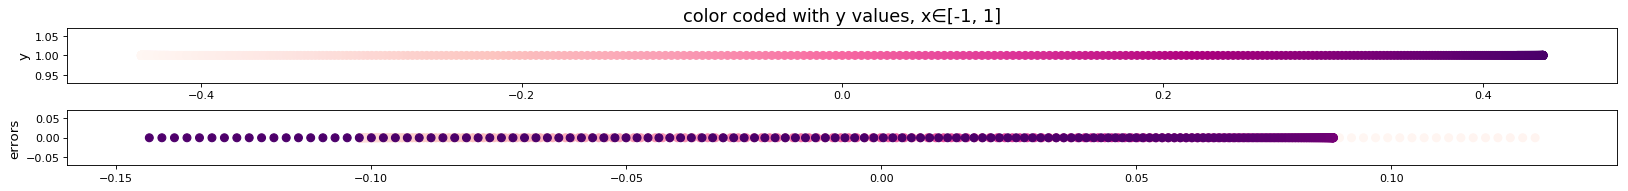

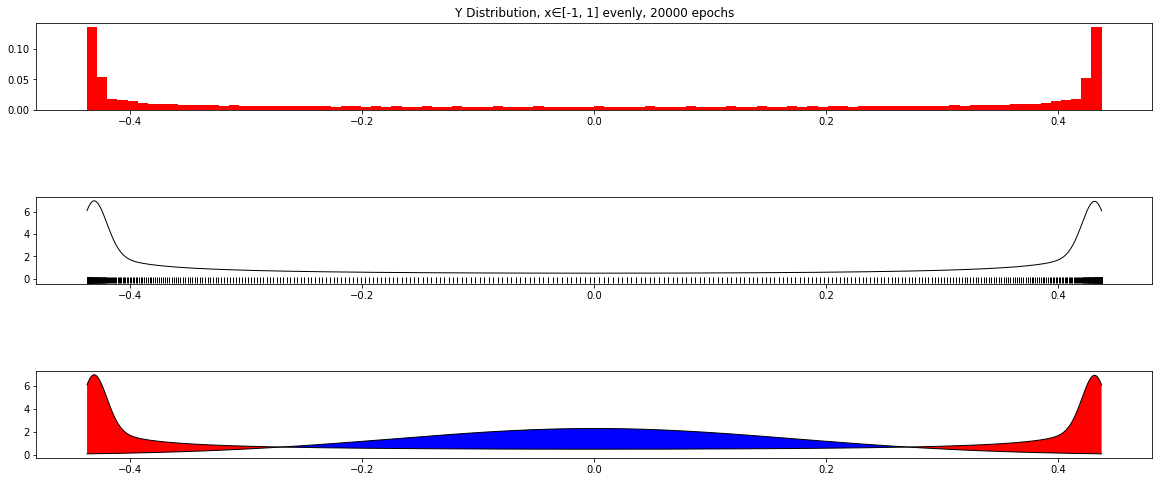

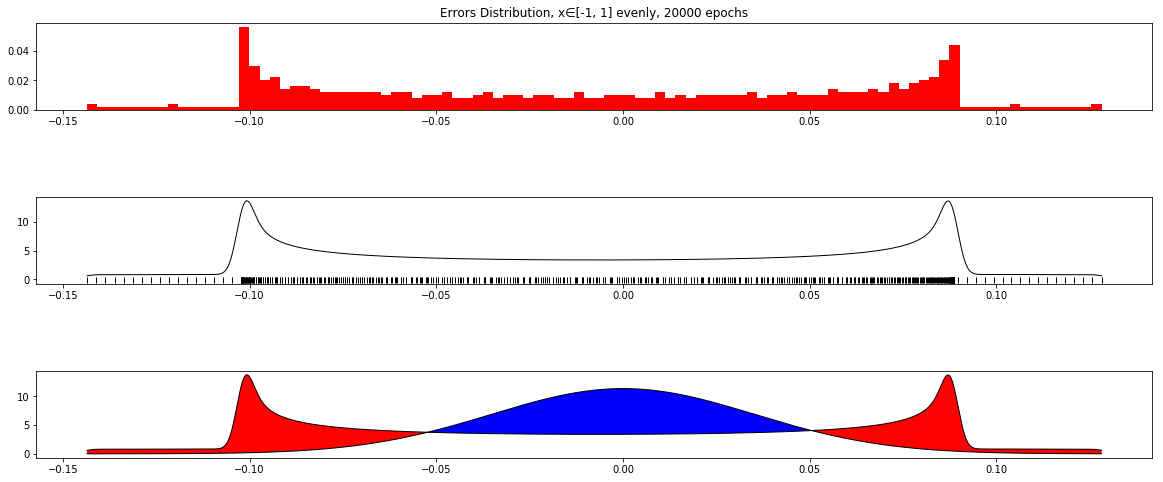

In [97]:
x, y = get_data(500, x_support_abs = 1)
model = get_benchmark_NN(x, y)
plot_data(x, y)
errors, _, _ = get_errors(model, x, y)
print("Spearman Correlation Coefficient:", scipy.stats.spearmanr(errors, y))
plot_y_and_errors_cor(y, errors, c=x, cmap='PuBu', title="color coded with x values, x∈[-1, 1]")
plot_y_and_errors_cor(y, errors, c=y, cmap='RdPu', title="color coded with y values, x∈[-1, 1]")
plot_errors(errors=y, target_sigma=np.sqrt(np.var(y))/2, title='Y Distribution, x∈[-1, 1] evenly, 20000 epochs')
plot_errors(errors=errors, target_sigma=np.sqrt(np.var(errors))/2, title='Errors Distribution, x∈[-1, 1] evenly, 20000 epochs')

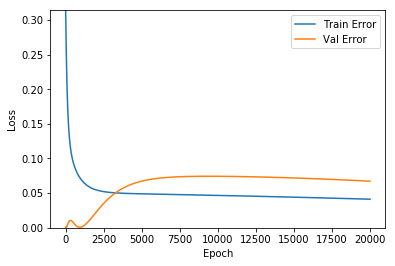

Spearman Correlation Coefficient: SpearmanrResult(correlation=0.7992564770259082, pvalue=3.356224020244269e-112)


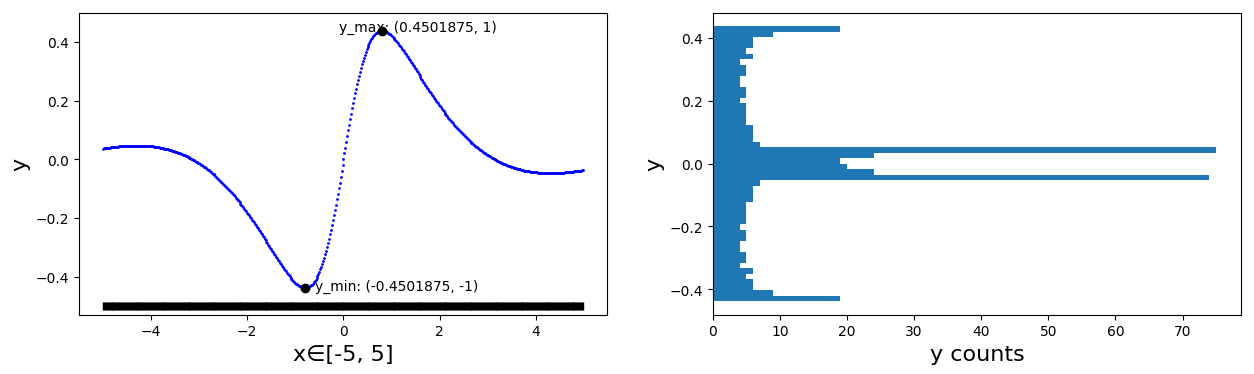

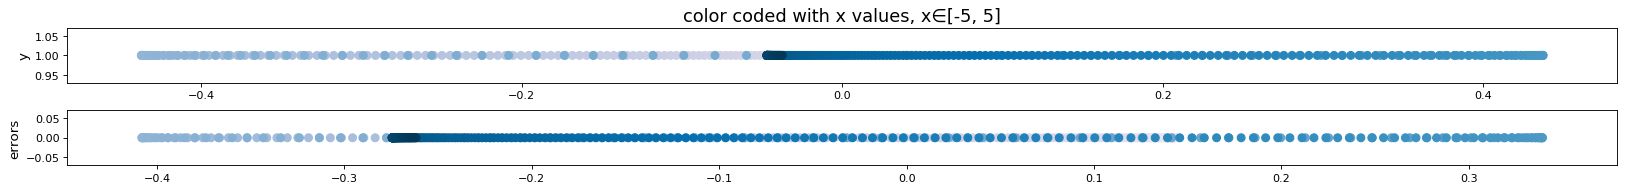

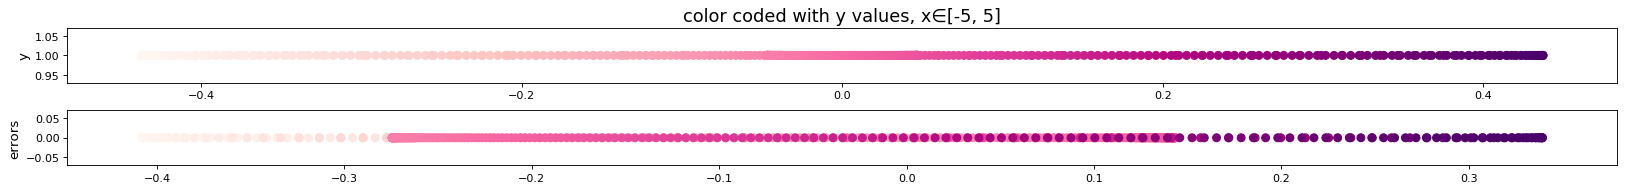

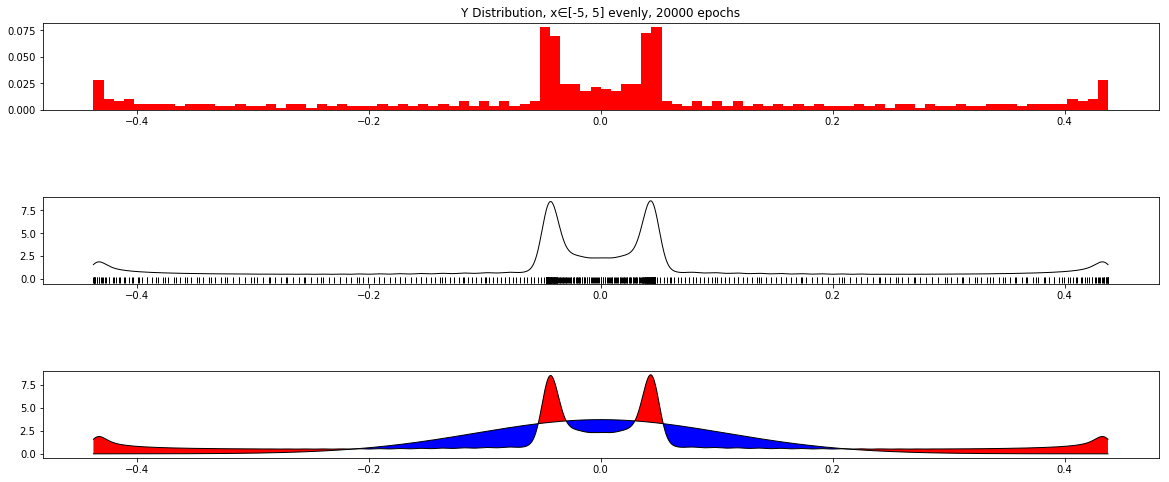

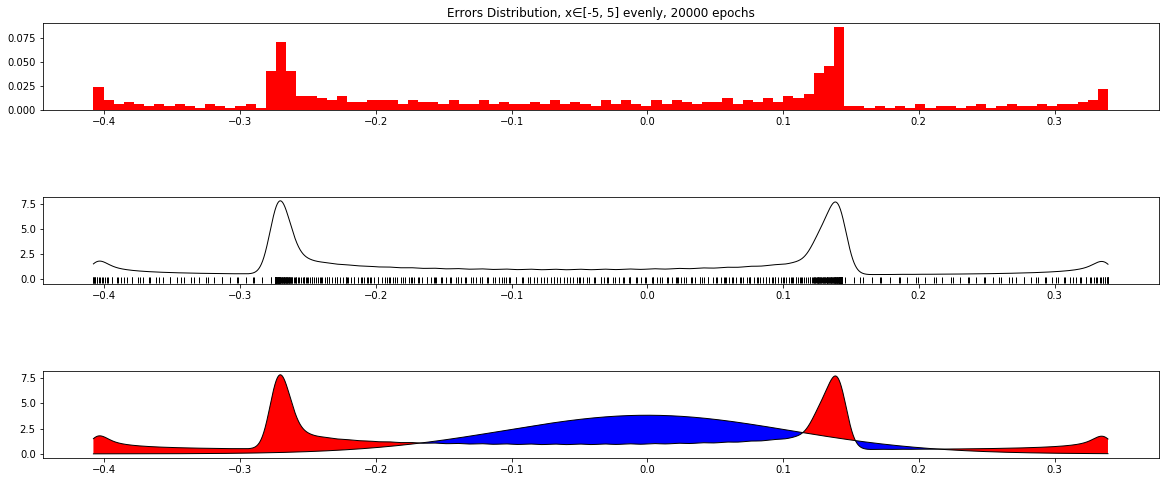

In [92]:
x, y = get_data(500, x_support_abs = 5)
model = get_benchmark_NN(x, y)
plot_data(x, y, x_label='x∈[-5, 5]')
errors, _, _ = get_errors(model, x, y)
print("Spearman Correlation Coefficient:", scipy.stats.spearmanr(errors, y))
plot_y_and_errors_cor(y, errors, c=x, cmap='PuBu', title="color coded with x values, x∈[-5, 5]")
plot_y_and_errors_cor(y, errors, c=y, cmap='RdPu', title="color coded with y values, x∈[-5, 5]")
plot_errors(errors=y, target_sigma=np.sqrt(np.var(y))/2, title='Y Distribution, x∈[-5, 5] evenly, 20000 epochs')
plot_errors(errors=errors, target_sigma=np.sqrt(np.var(errors))/2, title='Errors Distribution, x∈[-5, 5] evenly, 20000 epochs')

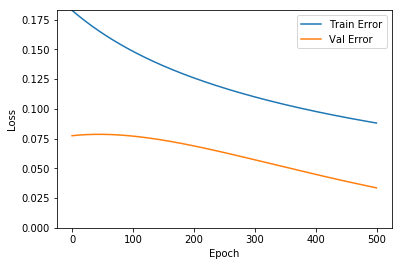

Spearman Correlation Coefficient: SpearmanrResult(correlation=0.8147308749234997, pvalue=5.8729832129241434e-120)


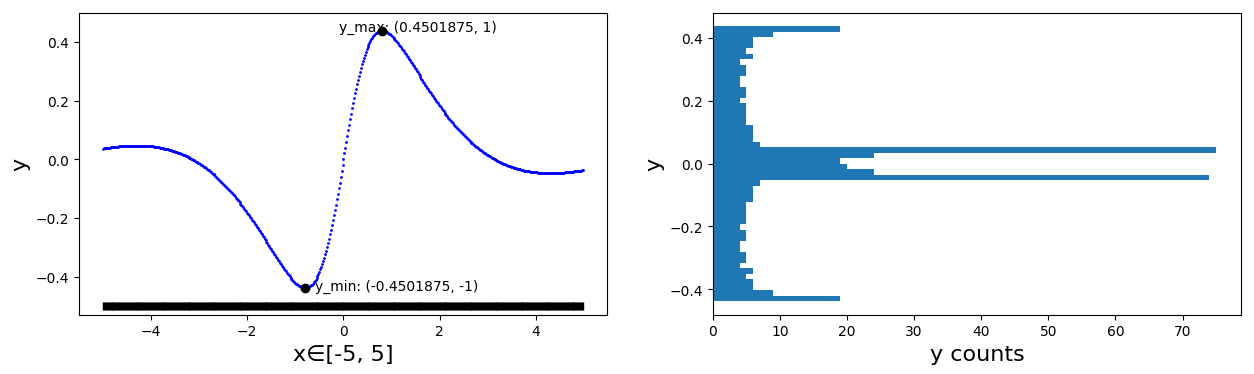

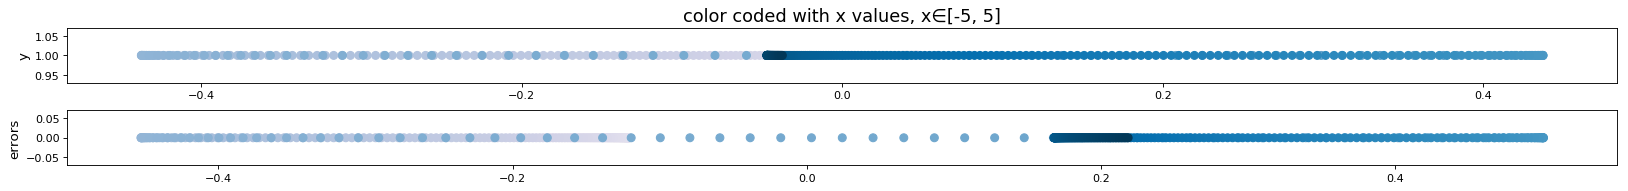

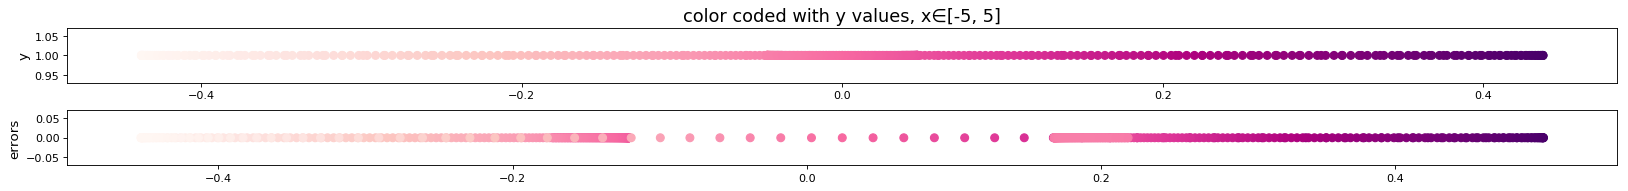

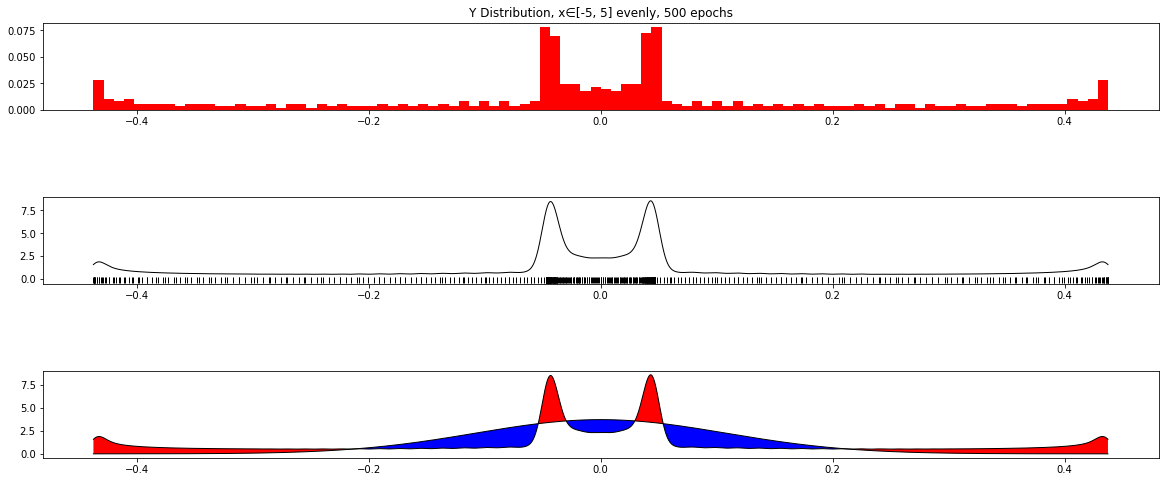

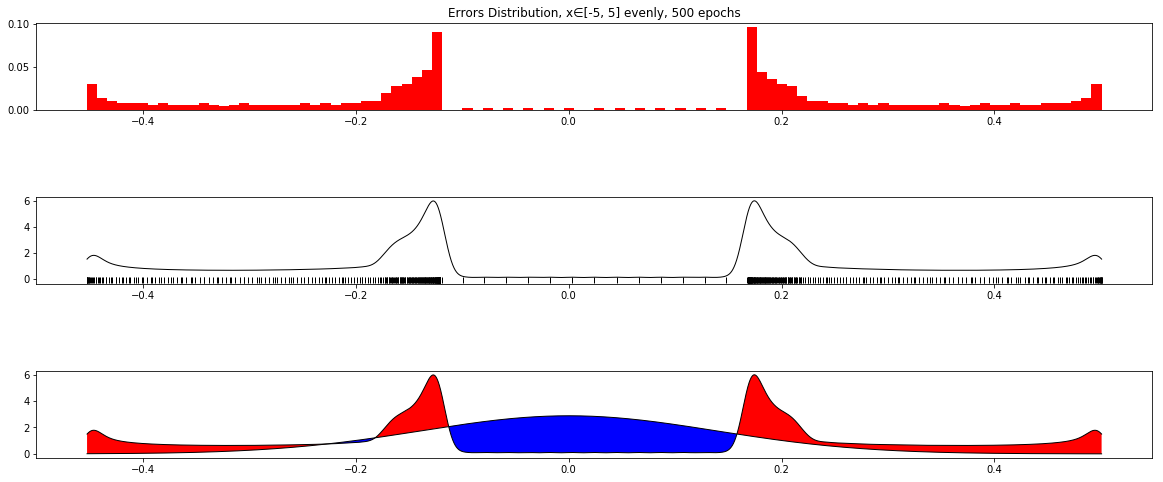

In [94]:
x, y = get_data(500, x_support_abs = 5)
model = get_benchmark_NN(x, y, epochs = 500)
plot_data(x, y, x_label='x∈[-5, 5]')
errors, _, _ = get_errors(model, x, y)
print("Spearman Correlation Coefficient:", scipy.stats.spearmanr(errors, y))
plot_y_and_errors_cor(y, errors, c=x, cmap='PuBu', title="color coded with x values, x∈[-5, 5]")
plot_y_and_errors_cor(y, errors, c=y, cmap='RdPu', title="color coded with y values, x∈[-5, 5]")
plot_errors(errors=y, target_sigma=np.sqrt(np.var(y))/2, title='Y Distribution, x∈[-5, 5] evenly, 500 epochs')
plot_errors(errors=errors, target_sigma=np.sqrt(np.var(errors))/2, title='Errors Distribution, x∈[-5, 5] evenly, 500 epochs')

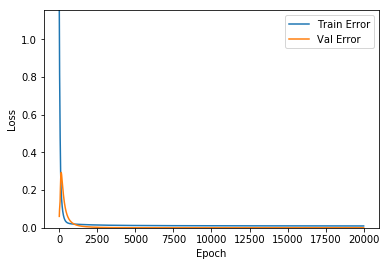

Spearman Correlation Coefficient: SpearmanrResult(correlation=0.5060589202356809, pvalue=7.147908045274415e-34)


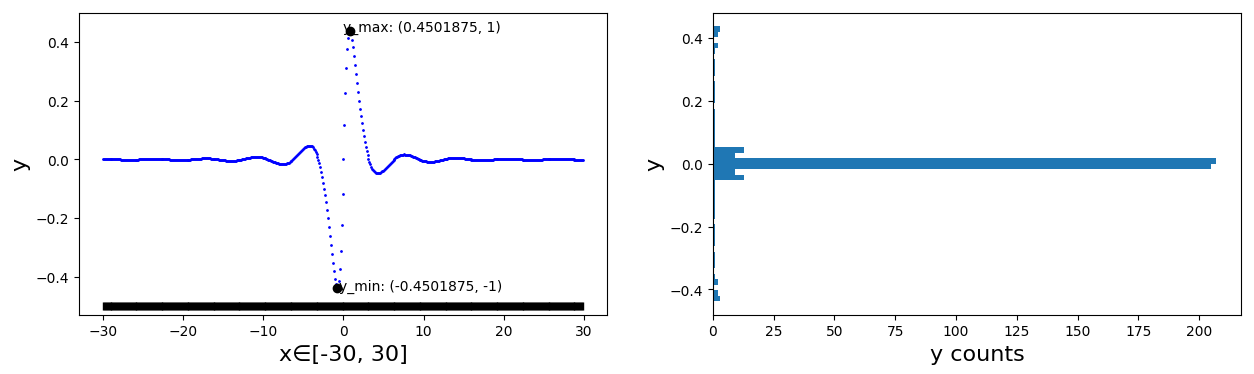

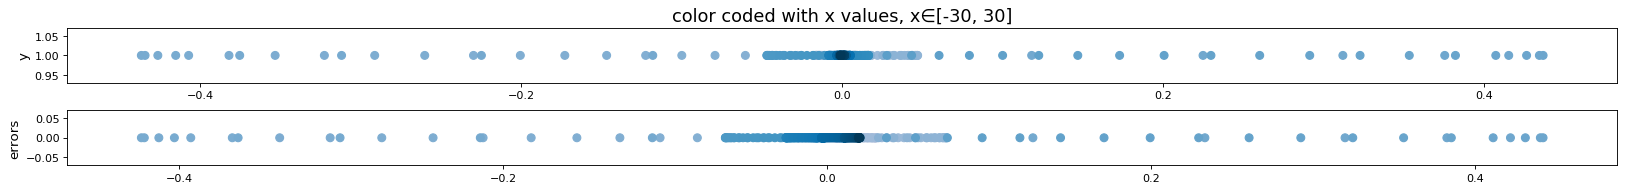

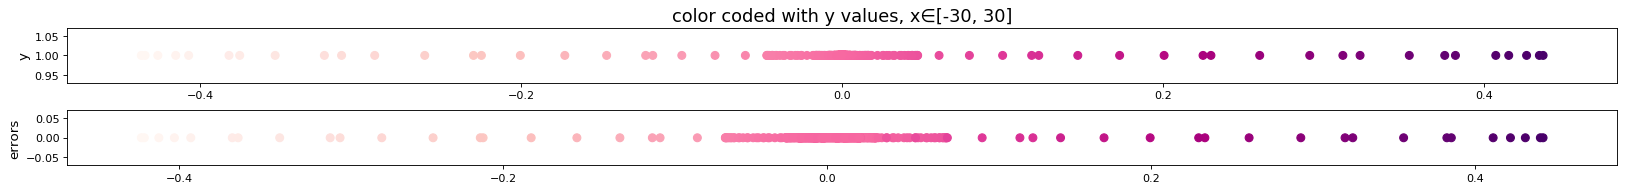

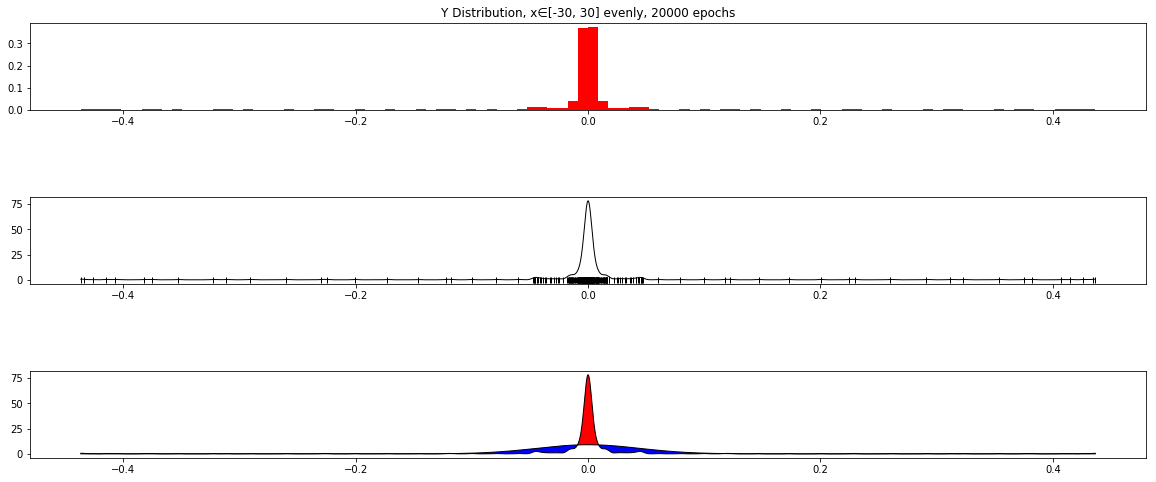

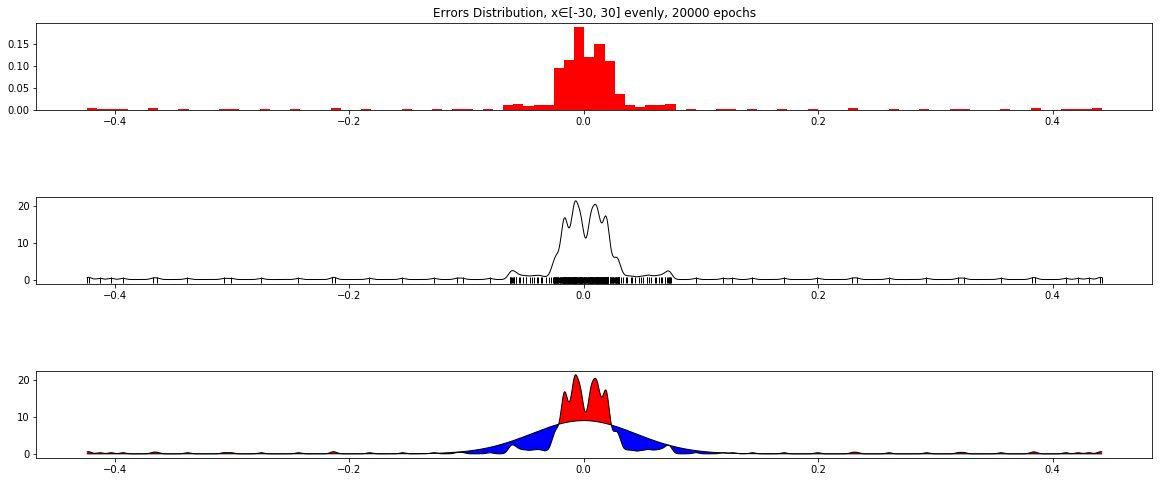

In [95]:
x, y = get_data(500, x_support_abs = 30)
model = get_benchmark_NN(x, y)
plot_data(x, y, x_label='x∈[-30, 30]')
errors, _, _ = get_errors(model, x, y)
print("Spearman Correlation Coefficient:", scipy.stats.spearmanr(errors, y))
plot_y_and_errors_cor(y, errors, c=x, cmap='PuBu', title="color coded with x values, x∈[-30, 30]")
plot_y_and_errors_cor(y, errors, c=y, cmap='RdPu', title="color coded with y values, x∈[-30, 30]")
plot_errors(errors=y, target_sigma=np.sqrt(np.var(y))/2, title='Y Distribution, x∈[-30, 30] evenly, 20000 epochs')
plot_errors(errors=errors, target_sigma=np.sqrt(np.var(errors)), title='Errors Distribution, x∈[-30, 30] evenly, 20000 epochs')

In [0]:
def plot_y_and_errors_cor(y, errors, c, cmap, title=None):
  plt.figure(figsize=(25, 5), dpi=80, edgecolor='k')
  plt.subplots_adjust(hspace=0.5)

  ax1=plt.subplot(4, 1, 1)
  ax1.scatter(y, [1]*len(y), c=c, cmap=cmap, s=50)
  ax1.set_title(title, fontsize=16)
  ax1.set_ylabel("y", fontsize=12)

  ax2=plt.subplot(4, 1, 2)
  ax2.scatter(errors, [0]*len(y), c=c, cmap=cmap, s=50)
  ax2.set_ylabel("errors", fontsize=12)

  plt.show()
  
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist['epoch'], hist['loss'], label='Train Error')
  plt.plot(hist['epoch'], hist['val_loss'], label = 'Val Error')
  plt.ylim([0,np.max(hist['loss'])])
  plt.legend()
  plt.show()

def build_model(if_print=False):
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation='sigmoid', input_shape=[1]),
    tf.keras.layers.Dense(1)])
  optimizer = tf.keras.optimizers.SGD(0.001)
  model.compile(loss='mse',optimizer=optimizer)
  if if_print: model.summary()
  return model

def get_data(data_size=10000, x_support_abs=1, seed=0):
  f=lambda x:np.sin(x)/(1+x**2)
  np.random.seed(seed)
  #x = np.random.uniform(-x_support_abs, x_support_abs, data_size)
  x = np.arange(-x_support_abs, x_support_abs, 2*x_support_abs/data_size)
  y = [f(i) for i in x]
  #print("x[:2]:", x[:2])
  return x,y

def get_benchmark_NN(x, y, epochs=20000):
  seed = 0
  np.random.seed(seed)
  model = build_model()
  history = model.fit(x, y, batch_size = len(x), epochs=epochs, validation_split = 0.2, verbose=0)
  plot_history(history)
   
  return model

def print_model(model):
  model.summary()
  print("layer 1 weights:", ', '.join([str(item) for item in model.layers[0].trainable_variables[0].numpy()]))
  print("layer 1 bias:", ', '.join([str(item) for item in model.layers[0].trainable_variables[1].numpy()]))
  print("layer 2 weights:", ', '.join([str(item) for item in model.layers[1].trainable_variables[0].numpy()]))
  print("layer 2 bias:", ', '.join([str(item) for item in model.layers[1].trainable_variables[1].numpy()]))
    
def print_first_layer(model):
  print("First layer:", ', '.join([str(item) for item in model.layers[0].trainable_variables[0].numpy()]))
    
def get_errors(model, x, y, if_print=False):
  y_pred = model.predict(x)
  y_pred = y_pred.reshape(-1)
  errors = y - y_pred
  mean = np.mean(errors)
  sigma = np.sqrt(np.var(errors))
  if if_print:
    print("\nmean of errors:", mean)
    print("standard deviation of errors:", sigma)
  
  return errors, mean, sigma

def get_kde(errors):
  kde=stats.gaussian_kde(errors)
  kde.set_bandwidth(bw_method=kde.factor/10)
  return kde
def plot_errors(errors, target_sigma, title):
  plt.figure(figsize=(20, 8))
  plt.xticks(fontsize=10)
  plt.subplots_adjust(hspace=1)

  p1 = plt.subplot(311)
  p1.title.set_text(title)
  weights = np.ones_like(errors)/float(len(errors))
  _, _, _ = plt.hist(errors, weights=weights,bins=100, color='red')

  p2 = plt.subplot(312)

  x1 = np.linspace(np.min(errors), np.max(errors), num=10000)
  kde = get_kde(errors)
  y1 = kde(x1)
  plt.plot(x1, y1, color='black', linewidth=1)
  plt.plot(errors, np.full_like(errors, -0.1), '|k', markeredgewidth=1)

  p3 = plt.subplot(313)
  y_norm = stats.norm.pdf(x1, 0, target_sigma)
  plt.plot(x1, y1, x1, y_norm, color='black', linewidth=1)
  plt.fill_between(x1, y1, y_norm, where=y_norm >= y1, facecolor='blue', interpolate=True)
  plt.fill_between(x1, y1, y_norm, where=y_norm <= y1, facecolor='red', interpolate=True)

### Benchmark Loss (Target Normal) and Gradient

In [0]:
def get_loss(errors, sigma, if_plot=False):
  def normal_minus_kde(x, mean, sigma, errors):
    kde = get_kde(errors)
    value = np.square(scipy.stats.norm.pdf(x,mean,sigma) - kde(x))
    #value = np.square(sigma - kde(x))
    return value
  
  loss, err = quad(normal_minus_kde, -1, 1, args=(0, sigma, errors))

  if if_plot:
    kde = get_kde(errors)
    x1 = np.linspace(np.min(errors), np.max(errors), num=10000)
    y1 = kde(x1)
    
    plt.figure(figsize=(20, 4))
    plt.xticks(fontsize=10)
    plt.subplots_adjust(hspace=0.3)

    p1 = plt.subplot(211)
    diffs=[np.abs(stats.norm.pdf(i, 0, sigma)-kde(i))[0] for i in x1]
    p1.plot(x1, diffs)
    plt.xlim(np.min(errors), np.max(errors))
    p1.title.set_text("Difference between Normal and Errors")

    p2 = plt.subplot(212)
    y_norm = stats.norm.pdf(x1, 0, sigma)
    p2.plot(x1, y1, x1, y_norm, color='black', linewidth=1)
    p2.fill_between(x1, y1, y_norm, where=y_norm >= y1, facecolor='blue', interpolate=True)
    p2.fill_between(x1, y1, y_norm, where=y_norm <= y1, facecolor='red', interpolate=True)
    plt.xlim(np.min(errors), np.max(errors))
  
  return loss

def node_plus_delta(model, node_n, delta):
  nodes_n_in_layer_0 = 5
  if 0<=node_n<=(nodes_n_in_layer_0-1): 
    weights = model.layers[0].trainable_variables[0].numpy()
    #print("\n first layer biases:", weights, ", node_n:", node_n)
    #print(weights)
    weights[0][node_n] += delta
    model.layers[0].trainable_variables[0].assign(weights)
    #print(weights)
    
  elif nodes_n_in_layer_0<=node_n<=(2*nodes_n_in_layer_0-1):
    weights = model.layers[0].trainable_variables[1].numpy()
    #print("\n first layer biases:", weights, ", node_n:", node_n)
    #print(weights)
    weights[node_n-nodes_n_in_layer_0] += delta
    model.layers[0].trainable_variables[1].assign(weights)
    #print(weights)
    
  elif 2*nodes_n_in_layer_0<=node_n<=(3*nodes_n_in_layer_0-1):
    weights = model.layers[1].trainable_variables[0].numpy()
    #print("\n second layer weights:", weights, ", node_n:", node_n)
    #print(weights)
    weights[node_n-2*nodes_n_in_layer_0] += delta
    model.layers[1].trainable_variables[0].assign(weights)
    #print(weights)
    
  elif node_n==3*nodes_n_in_layer_0:
    weights = model.layers[0].trainable_variables[0].numpy()
    #print("\n second layer bias:", weights, ", node_n:", node_n)
    #print(weights)
    weights += delta
    model.layers[0].trainable_variables[0].assign(weights)
    #print(weights)
 
  return model

def node_plus_delta_loss(model, x, y, node_n, delta, target_sigma):
  model = node_plus_delta(model, node_n, delta)
  errors, mean, sigma = get_errors(model, x, y)
  loss = get_loss(errors, target_sigma)
  return loss, model

def get_gradient(model, x, y, target_sigma):
  delta_base = 10**(-6)
  nodes_n_in_layer_0 = 5
  grads = []; delta_steps_all = []
  for i in range(3*nodes_n_in_layer_0 + 1):
    delta_steps = 0
    while True:
      delta_steps += 1
      delta = delta_steps*10**(-6)
      plus_loss, _ = node_plus_delta_loss(model, x, y, i, delta, target_sigma)
      minus_loss, _ = node_plus_delta_loss(model, x, y, i, -delta, target_sigma)
      if plus_loss != minus_loss or delta_steps == 10: break

    numerator = plus_loss - minus_loss
    grad = numerator/(2*delta)
    grads.append(grad)
    delta_steps_all.append(delta_steps)
    #print("delta_steps:", delta_steps, "grad:", grad)

  return grads, delta_steps_all

def update_model(model, grads, delta_steps_all, lr):
  for i in range(len(grads)):
    delta = lr*grads[i]*delta_steps_all[i]
    #print("i:", i, "delta:", delta)
    model = node_plus_delta(model, i, -delta/2)
  return model

In [4]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
%cd /content/gdrive/My\ Drive/Colab\ Notebooks/ckp
!pwd

Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks/ckp
/content/gdrive/My Drive/Colab Notebooks/ckp


In [9]:
!pip install -q h5py pyyaml
from __future__ import absolute_import, division, print_function, unicode_literals
import os
tf.__version__

'2.0.0-beta1'

x[:2]: [ 2.92881024 12.91136198]
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 128)               256       
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 129       
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________


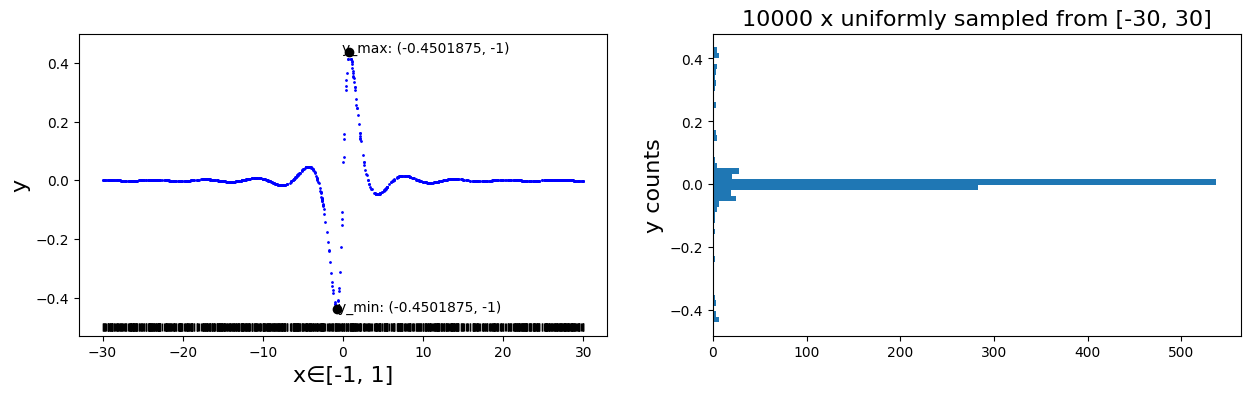

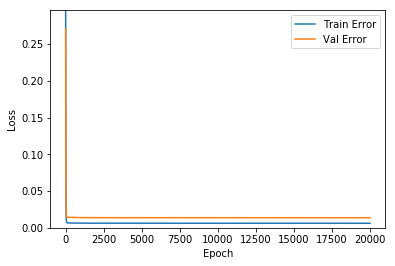

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 128)               256       
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 129       
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________
layer 1 weights: [-0.16793479 -0.05135573  0.1236762   0.04108661 -0.121842    0.11308752
  0.13057609 -0.17431085  0.20691074 -0.19179073  0.04950625  0.16124628
  0.08848273 -0.14273778 -0.1546487   0.04856898  0.18155685  0.1407869
 -0.07063695 -0.15471405  0.1940102   0.15549804 -0.05233608  0.1472722
  0.16199203  0.189034    0.16945598 -0.1217814   0.05885189  0.17389145
 -0.18390638  0.12005423 -0.06880568  0.1032764   0.18717067  0.12231239
  0.12950748  0.02654774 -0.16147178 -0.15681916  0.06830858 -0.1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  



Initial loss: 21.76465742814852
target_sigma: 0.021869737367588186
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 128)               256       
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 129       
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________
layer 1 weights: [-0.16793479 -0.05135573  0.1236762   0.04108661 -0.121842    0.11308752
  0.13057609 -0.17431085  0.20691074 -0.19179073  0.04950625  0.16124628
  0.08848273 -0.14273778 -0.1546487   0.04856898  0.18155685  0.1407869
 -0.07063695 -0.15471405  0.1940102   0.15549804 -0.05233608  0.1472722
  0.16199203  0.189034    0.16945598 -0.1217814   0.05885189  0.17389145
 -0.18390638  0.12005423 -0.06880568  0.1032764   0.18717067  0.122312

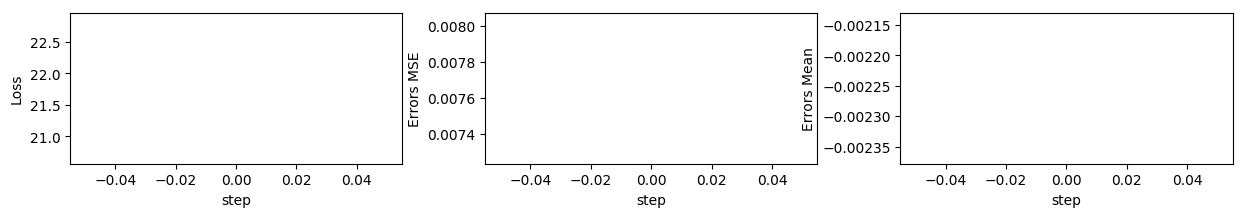

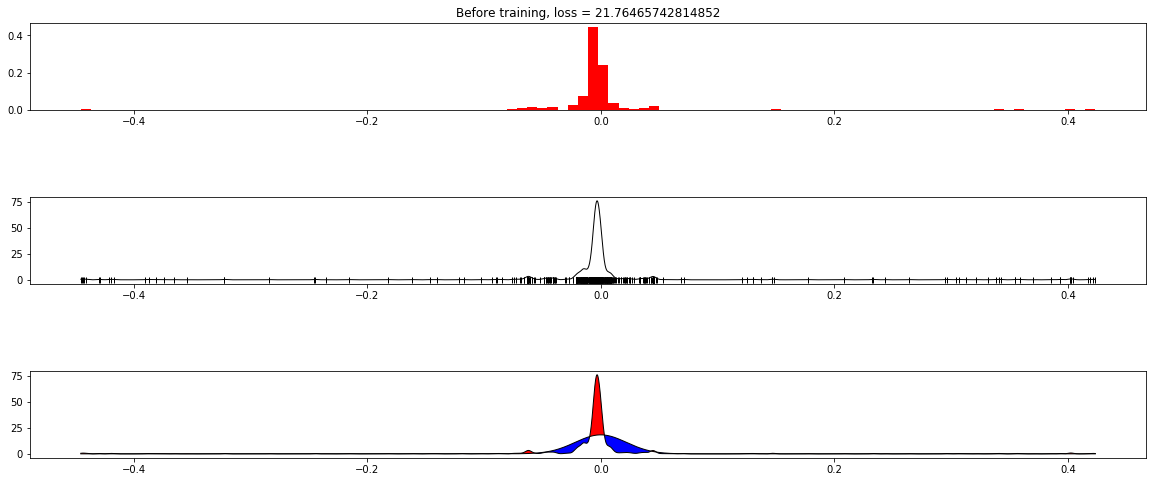

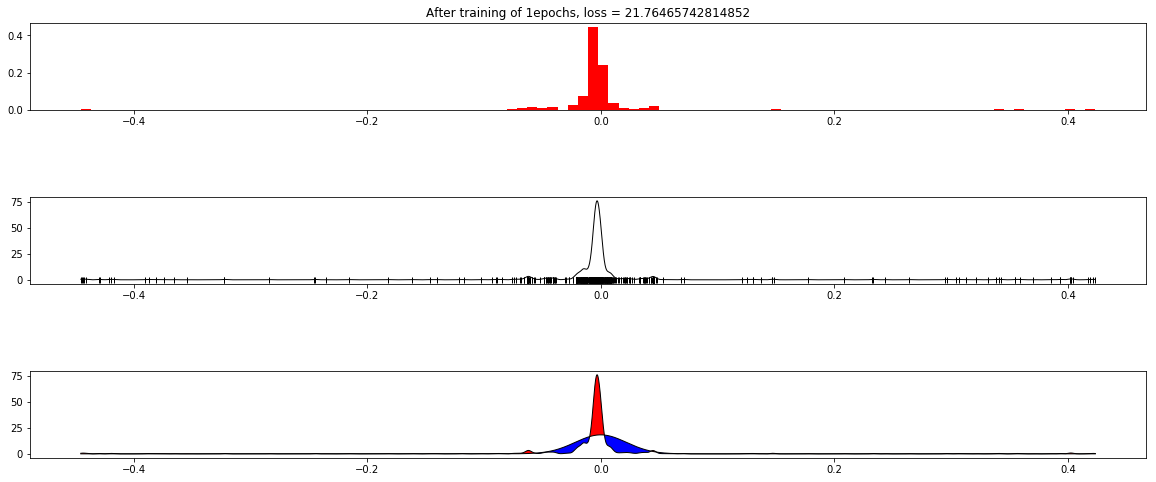

In [287]:
def save_model_and_errors_files(subname, model, errors_all):
  extra = str(datetime.datetime.now().date()) + '_' + str(datetime.datetime.now().time())
  model_name = 'model_0711_' + subname + '_' + extra + '.h5'
  model.save(model_name)
  errors_name = 'errors_0711_' + subname + '_' + extra + '.txt'
  file = open(errors_name, 'w')
  for ers in errors_all:
    file.write("\n")
    file.write(str(ers))
  file.close()
  
def print_result(model, losses, errors_all, errors_mses, errors_means, target_sigma):
  print("target_sigma:", target_sigma)
  print_model(model)
  xs = np.arange(len(losses))

  plt.figure(dpi=100, figsize=(15, 2))
  plt.xticks(fontsize=10)
  plt.subplots_adjust(wspace=0.25)

  p1 = plt.subplot(131)
  p1.plot(xs, losses)
  plt.xlabel("step")
  plt.ylabel("Loss")
  
  p2 = plt.subplot(132)
  p2.plot(xs, errors_mses)
  plt.xlabel("step")
  plt.ylabel("Errors MSE")

  p3 = plt.subplot(133)
  p3.plot(xs, errors_means)
  plt.xlabel("step")
  plt.ylabel("Errors Mean")
 
  title = "Before training, loss = " + str(losses[0])
  plot_errors(errors_all[0], target_sigma, title)
  loss_min_index = losses.index(np.min(losses))
  title = "After training of " + str(loss_min_index+1) + "epochs, loss = " + str(np.min(losses))
  plot_errors(errors_all[loss_min_index], target_sigma, title)
  
def reload_model(file_name):
  model = tf.keras.models.load_model(file_name)
  model.summary()
  return model

def train_dist(step_n=50, if_continue = 1, model=None):
  x, y = get_data(1000)
  plot_data(x, y, "10000 x uniformly sampled from [-30, 30]")
  if if_continue: model = model
  else: model = get_benchmark_NN(x, y)
  print_model(model)
  errors, mean, sigma = get_errors(model, x, y, if_print=1)
  errors_first = errors
  target_sigma = sigma/4
  print("target_sigma:", target_sigma)
  benchmark_loss = get_loss(errors, target_sigma)
  print("\nInitial loss:", benchmark_loss)
  
  lr_init = 0.001
  lr = lr_init
  patience_init = 20
  patience = patience_init
  losses=[]; errors_all = []; errors_mses=[]; errors_means=[]
  losses.append(benchmark_loss); errors_mses.append(sigma**2); errors_means.append(mean); errors_all.append(errors)
  for i in range(step_n):
    print("-----Step", i)
      
    # estimate gradient and model updates
    grads, deltas = get_gradient(model, x, y, target_sigma)
    model = update_model(model, grads, deltas, lr=lr)
    
    # get errors and losses
    errors, mean, sigma = get_errors(model, x, y)
    new_loss = get_loss(errors, target_sigma)
    if new_loss < np.min(losses): patience = patience_init
    else: patience-= 1
     
    # record results
    print("New loss:", new_loss, "    (learning rate:", lr, ")")
    total_improv = (losses[0]-new_loss)/losses[0]
    print("total improvement:", total_improv, ", last step improvement:", (losses[-1]-new_loss)/losses[-1])
    losses.append(new_loss)
    errors_mses.append(sigma**2)
    errors_means.append(mean)
    errors_all.append(errors)
    if i%2 == 0:
      subname = str(i)
      save_model_and_errors_files(subname, model, errors_all)
    #update learning rate and check early stopping
    if i%5 == 0:
      title = "epoch:" + str(i)
      plot_errors(errors_all[-1], target_sigma, title)
    lr*=0.99
    if patience <0: break

  return model, losses, errors_all, errors_mses, errors_means, target_sigma

start_time = time.time()
nodes_n_in_layer_0 = 5
model, losses, errors_all, errors_mses, errors_means, target_sigma = train_dist(step_n=0, if_continue = 0)
# model = reload_model(file_name)
# model, losses, errors_all, errors_mses, errors_means, target_sigma = train_dist(step_n=10, if_continue=1, model=model)
print_result(model, losses, errors_all, errors_mses, errors_means, target_sigma)
print("--- %s minutes ---" % (str((time.time() - start_time)/60)))

In [0]:
def save_model_and_errors_files(subname, model, errors_all):
  extra = str(datetime.datetime.now().date()) + '_' + str(datetime.datetime.now().time())
  model_name = 'model_0711_' + subname + '_' + extra + '.h5'
  model.save(model_name)
  errors_name = 'errors_0711_' + subname + '_' + extra + '.txt'
  file = open(errors_name, 'w')
  for ers in errors_all:
    file.write("\n")
    file.write(str(ers))
  file.close()
  
def print_result(model, losses, errors_all, errors_mses, errors_means, target_sigma):
  print("target_sigma:", target_sigma)
  print_model(model)
  xs = np.arange(len(losses))

  plt.figure(dpi=100, figsize=(15, 2))
  plt.xticks(fontsize=10)
  plt.subplots_adjust(wspace=0.25)

  p1 = plt.subplot(131)
  p1.plot(xs, losses)
  plt.xlabel("step")
  plt.ylabel("Loss")
  
  p2 = plt.subplot(132)
  p2.plot(xs, errors_mses)
  plt.xlabel("step")
  plt.ylabel("Errors MSE")

  p3 = plt.subplot(133)
  p3.plot(xs, errors_means)
  plt.xlabel("step")
  plt.ylabel("Errors Mean")
 
  title = "Before training, loss = " + str(losses[0])
  plot_errors(errors_all[0], target_sigma, title)
  loss_min_index = losses.index(np.min(losses))
  title = "After training of " + str(loss_min_index+1) + "epochs, loss = " + str(np.min(losses))
  plot_errors(errors_all[loss_min_index], target_sigma, title)
  
def reload_model(file_name):
  model = tf.keras.models.load_model(file_name)
  model.summary()
  return model

def train_dist(step_n=50, if_continue = 1, model=None):
  x, y = get_data(1000)
  plot_data(x, y, "10000 x uniformly sampled from [-30, 30]")
  if if_continue: model = model
  else: model = get_benchmark_NN(x, y)
  print_model(model)
  errors, mean, sigma = get_errors(model, x, y, if_print=1)
  errors_first = errors
  target_sigma = sigma/4
  print("target_sigma:", target_sigma)
  benchmark_loss = get_loss(errors, target_sigma)
  print("\nInitial loss:", benchmark_loss)
  
  lr_init = 0.001
  lr = lr_init
  patience_init = 20
  patience = patience_init
  losses=[]; errors_all = []; errors_mses=[]; errors_means=[]
  losses.append(benchmark_loss); errors_mses.append(sigma**2); errors_means.append(mean); errors_all.append(errors)
  for i in range(step_n):
    print("-----Step", i)
      
    # estimate gradient and model updates
    grads, deltas = get_gradient(model, x, y, target_sigma)
    model = update_model(model, grads, deltas, lr=lr)
    
    # get errors and losses
    errors, mean, sigma = get_errors(model, x, y)
    new_loss = get_loss(errors, target_sigma)
    if new_loss < np.min(losses): patience = patience_init
    else: patience-= 1
     
    # record results
    print("New loss:", new_loss, "    (learning rate:", lr, ")")
    total_improv = (losses[0]-new_loss)/losses[0]
    print("total improvement:", total_improv, ", last step improvement:", (losses[-1]-new_loss)/losses[-1])
    losses.append(new_loss)
    errors_mses.append(sigma**2)
    errors_means.append(mean)
    errors_all.append(errors)
    if i%2 == 0:
      subname = str(i)
      save_model_and_errors_files(subname, model, errors_all)
    #update learning rate and check early stopping
    if i%5 == 0:
      title = "epoch:" + str(i)
      plot_errors(errors_all[-1], target_sigma, title)
    lr*=0.99
    if patience <0: break

  return model, losses, errors_all, errors_mses, errors_means, target_sigma

start_time = time.time()
nodes_n_in_layer_0 = 5
model, losses, errors_all, errors_mses, errors_means, target_sigma = train_dist(step_n=0, if_continue = 0)
# model = reload_model(file_name)
# model, losses, errors_all, errors_mses, errors_means, target_sigma = train_dist(step_n=10, if_continue=1, model=model)
print_result(model, losses, errors_all, errors_mses, errors_means, target_sigma)
print("--- %s minutes ---" % (str((time.time() - start_time)/60)))

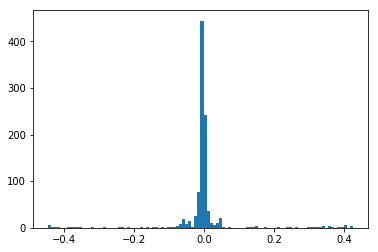

In [291]:
_ = plt.hist(errors_all[0], bins=100)

In [0]:
!pip install fitter
from fitter import Fitter

,sumsquare_error
johnsonsb,69.657747
arcsine,104.824764
beta,157.588601
gausshyper,407.023704
genpareto,659.851718


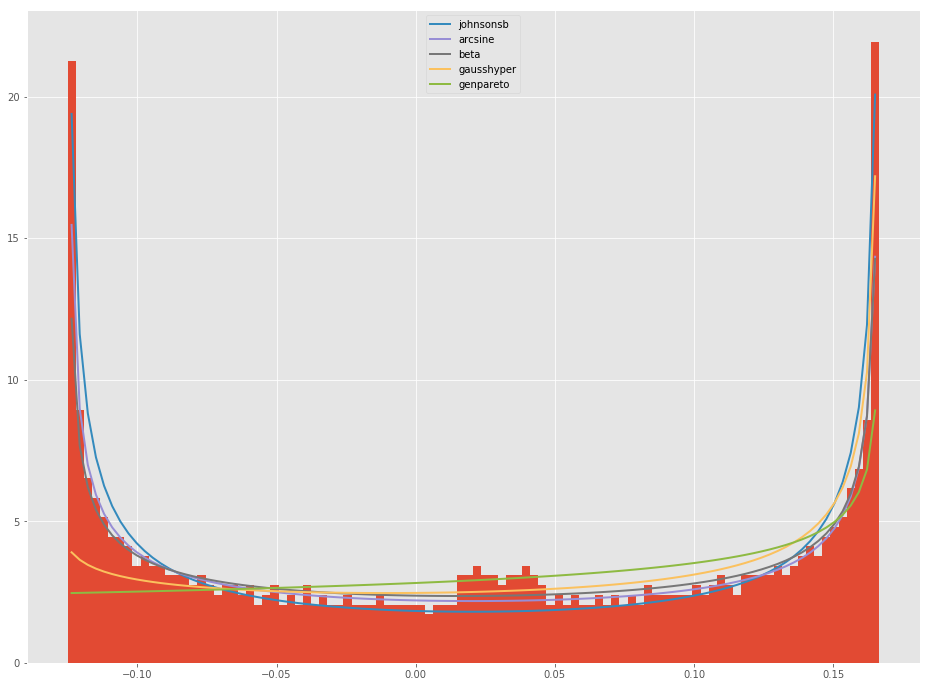

In [137]:
x, y = get_data(1000, x_support_abs = 1)
model = get_benchmark_NN(x, y)
errors, _, _ = get_errors(model, x, y)
f = Fitter(errors, verbose=False)
f.fit()
f.summary()

,sumsquare_error
nct,131.618057
t,131.626202
tukeylambda,138.323822
johnsonsu,145.509198
norminvgauss,156.668735


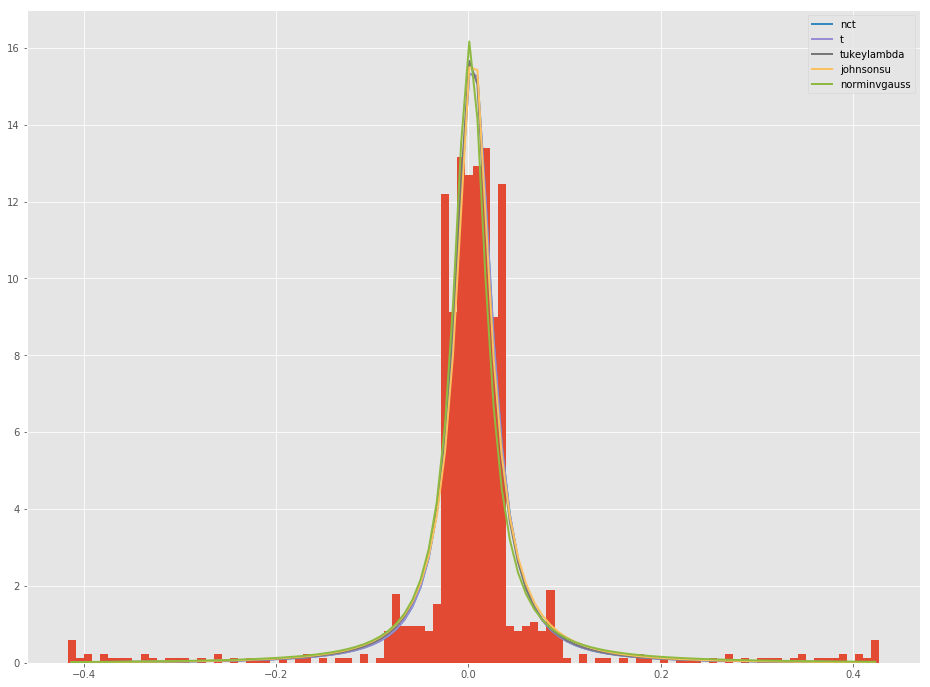

In [134]:
x, y = get_data(1000, x_support_abs = 30)
model = get_benchmark_NN(x, y)
errors, _, _ = get_errors(model, x, y)
f = Fitter(data=errors, verbose=False)
f.fit()
f.summary()